In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('US_Accidents_March23.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\4218199427.py:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('US_Accidents_March23.csv')


## Data Preparation and cleaning
- Load the file using pandas 
- Look at some information about the data and the columns 
- Fix any missing or incorrect values

In [3]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.405117e+06,2.405117e+06,2.405117e+06,0.0,0.0,2.405117e+06,2.367554e+06,1.786248e+06,2.364458e+06,2.374330e+06,2.362693e+06,2.238100e+06,1.701878e+06
mean,2.318984e+00,3.607937e+01,-9.346588e+01,NaN,NaN,2.211232e-01,6.191145e+01,5.913137e+01,6.629127e+01,2.954661e+01,9.072544e+00,7.575041e+00,9.084476e-03
std,5.107304e-01,4.823010e+00,1.645388e+01,NaN,NaN,1.664657e+00,1.852495e+01,2.186519e+01,2.226512e+01,9.353593e-01,2.575644e+00,5.345966e+00,1.213483e-01
min,1.000000e+00,2.455480e+01,-1.245344e+02,NaN,NaN,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.315557e+01,-1.109721e+02,NaN,NaN,0.000000e+00,5.000000e+01,4.350000e+01,5.000000e+01,2.932000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.535201e+01,-8.724869e+01,NaN,NaN,0.000000e+00,6.400000e+01,6.300000e+01,6.900000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.000996e+01,-8.084276e+01,NaN,NaN,0.000000e+00,7.590000e+01,7.600000e+01,8.500000e+01,3.002000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.755331e+01,NaN,NaN,4.417500e+02,2.030000e+02,1.960000e+02,1.000000e+02,5.832000e+01,1.110000e+02,8.228000e+02,3.647000e+01


In [5]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
len(data.columns)

46

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405117 entries, 0 to 2405116
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
#how many neumeric columns do we have in a data?
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', ]
numeric_data = data.select_dtypes(include=numerics)
len(numeric_data.columns)

13

In [9]:
#find missing values from the data using isna()
#False- no missing val , True - missing value is present
data.isna()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405112,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2405113,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2405114,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2405115,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#count of missing value per col
data.isna().sum().sort_values(ascending = False)

End_Lat                  2405117
End_Lng                  2405117
Precipitation(in)         703239
Wind_Chill(F)             618869
Wind_Speed(mph)           167017
Visibility(mi)             42424
Weather_Condition          41300
Humidity(%)                40659
Wind_Direction             40096
Temperature(F)             37563
Pressure(in)               30787
Weather_Timestamp          25803
Airport_Code                4411
Timezone                    1795
Street                      1712
Sunrise_Sunset              1666
Civil_Twilight              1666
Nautical_Twilight           1666
Astronomical_Twilight       1666
Zipcode                      351
City                          53
Description                    5
Give_Way                       1
Bump                           1
Roundabout                     1
Railway                        1
No_Exit                        1
Junction                       1
Crossing                       1
Traffic_Calming                1
Amenity   

In [16]:
#percentage of misssing values per column 
missing_val_percent =  data.isna().sum().sort_values(ascending = False) / len(data)
missing_val_percent

End_Lat                  1.000000e+00
End_Lng                  1.000000e+00
Precipitation(in)        2.923928e-01
Wind_Chill(F)            2.573135e-01
Wind_Speed(mph)          6.944236e-02
Visibility(mi)           1.763906e-02
Weather_Condition        1.717172e-02
Humidity(%)              1.690521e-02
Wind_Direction           1.667112e-02
Temperature(F)           1.561795e-02
Pressure(in)             1.280062e-02
Weather_Timestamp        1.072838e-02
Airport_Code             1.834006e-03
Timezone                 7.463254e-04
Street                   7.118157e-04
Sunrise_Sunset           6.926898e-04
Civil_Twilight           6.926898e-04
Nautical_Twilight        6.926898e-04
Astronomical_Twilight    6.926898e-04
Zipcode                  1.459388e-04
City                     2.203635e-05
Description              2.078901e-06
Give_Way                 4.157802e-07
Bump                     4.157802e-07
Roundabout               4.157802e-07
Railway                  4.157802e-07
No_Exit     

In [17]:
missing_val_percent[missing_val_percent!=0]

End_Lat                  1.000000e+00
End_Lng                  1.000000e+00
Precipitation(in)        2.923928e-01
Wind_Chill(F)            2.573135e-01
Wind_Speed(mph)          6.944236e-02
Visibility(mi)           1.763906e-02
Weather_Condition        1.717172e-02
Humidity(%)              1.690521e-02
Wind_Direction           1.667112e-02
Temperature(F)           1.561795e-02
Pressure(in)             1.280062e-02
Weather_Timestamp        1.072838e-02
Airport_Code             1.834006e-03
Timezone                 7.463254e-04
Street                   7.118157e-04
Sunrise_Sunset           6.926898e-04
Civil_Twilight           6.926898e-04
Nautical_Twilight        6.926898e-04
Astronomical_Twilight    6.926898e-04
Zipcode                  1.459388e-04
City                     2.203635e-05
Description              2.078901e-06
Give_Way                 4.157802e-07
Bump                     4.157802e-07
Roundabout               4.157802e-07
Railway                  4.157802e-07
No_Exit     

<Axes: >

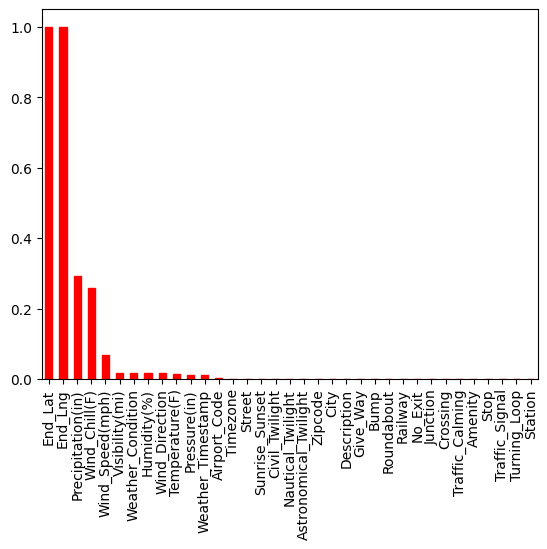

In [18]:
#lets plot graph to understand much better
missing_val_percent[missing_val_percent!=0].plot(kind='bar', color = "red", edgecolor= "red", grid=False)

In [19]:
#remove columns that you dont want to use - we will remove those col which contains highest number of missing values

# lets do analysis on some columns
- City
- Start_Time
- start_lat
- start_lng
- State
- weather

In [20]:
unique_city = data.City.unique()
len(unique_city)


10645

In [21]:
cities_by_accidents = data.City.value_counts()
cities_by_accidents

City
Houston           79910
Dallas            55897
Charlotte         53361
Austin            48244
Los Angeles       47075
                  ...  
Doddridge             1
Donaldsonville        1
Bel Alton             1
Alvada                1
Catlettsburg          1
Name: count, Length: 10644, dtype: int64

In [22]:
cities_by_accidents.head(10)

City
Houston          79910
Dallas           55897
Charlotte        53361
Austin           48244
Los Angeles      47075
Atlanta          28788
Raleigh          28704
Nashville        27196
Oklahoma City    26355
Baton Rouge      25949
Name: count, dtype: int64

<Axes: ylabel='City'>

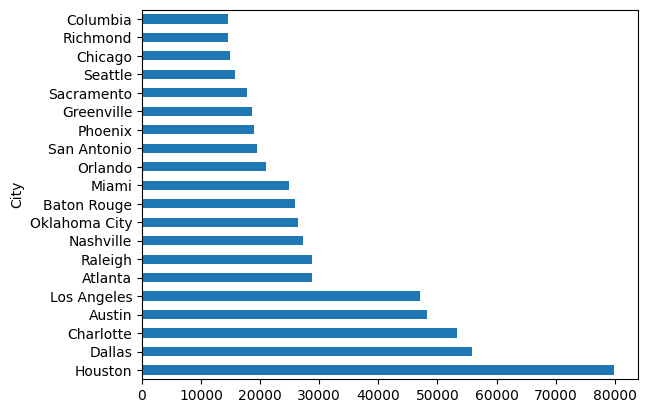

In [23]:
cities_by_accidents[:20].plot(kind='barh')

In [24]:
import seaborn as sns
sns.set_style("darkgrid")


<Axes: xlabel='count', ylabel='Count'>

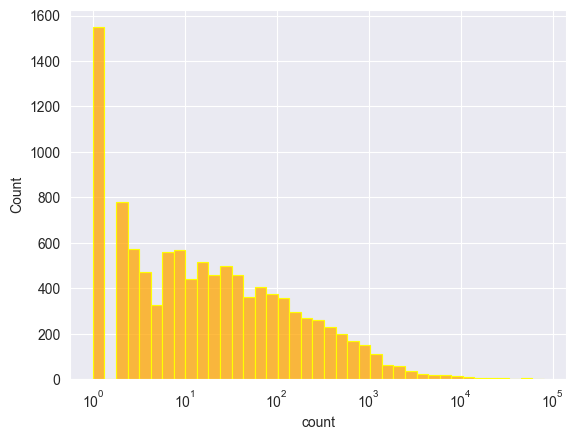

In [25]:
sns.histplot(cities_by_accidents, log_scale=True, color = 'orange', edgecolor= 'yellow')

In [26]:
highest_accident_cities= cities_by_accidents[cities_by_accidents>10000]
lowest_accident_cities = cities_by_accidents[cities_by_accidents<10000]

In [27]:
x = highest_accident_cities
y = highest_accident_cities

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\2463834701.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x,fit_kws={"color":"red"},label="label 1");
C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\2463834701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,fit_kws={"color":"blue"},l

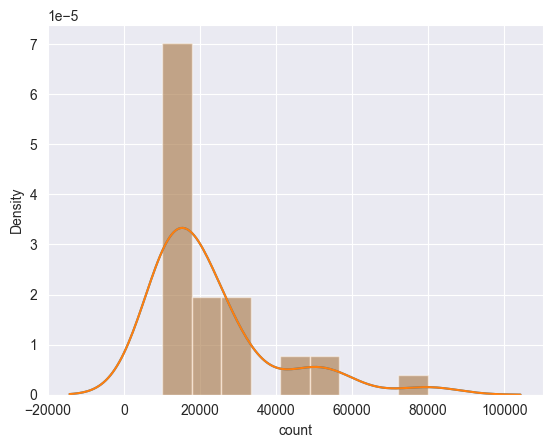

In [28]:
sns.distplot(x,fit_kws={"color":"red"},label="label 1"); 
sns.distplot(y,fit_kws={"color":"blue"},label="label 1"); 

In [29]:
x = lowest_accident_cities
y = lowest_accident_cities

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3449255590.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=30, color='red')
C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3449255590.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, bins=30, color='black')


<Axes: xlabel='count', ylabel='Density'>

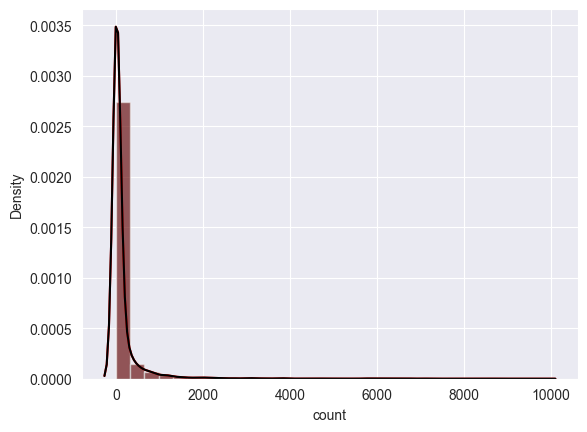

In [30]:
sns.distplot(x, bins=30, color='red')
sns.distplot(y, bins=30, color='black')

# Analyzing Start Time

In [31]:
data.start_time = pd.to_datetime(data.Start_Time)
data.start_time

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\2944962349.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.start_time = pd.to_datetime(data.Start_Time)


0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                  ...        
2405112   2018-12-25 02:05:52
2405113   2018-12-25 05:17:16
2405114   2018-12-25 06:18:19
2405115   2018-12-25 06:58:00
2405116   2018-12-25 03:16:18
Name: Start_Time, Length: 2405117, dtype: datetime64[ns]

In [32]:
#above code contains both date and time , so just extract hour (use- dt.hour)
chart=data.start_time.dt.hour

<Axes: xlabel='Start_Time', ylabel='Count'>

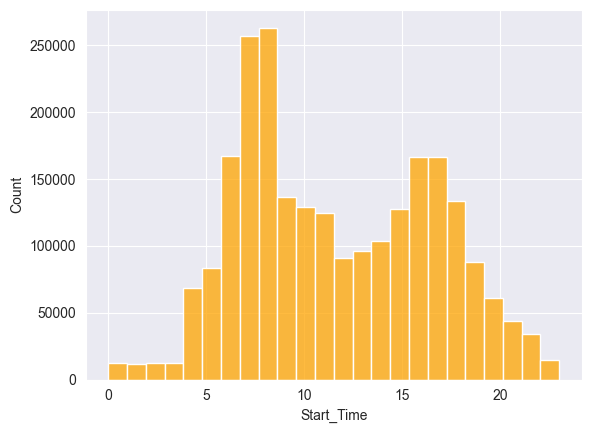

In [33]:
#lets show the data in chart
sns.histplot(chart, bins=24, color="orange")

- we can analyse that- 
 - 6am to 10am  most number of accidents happens (maybe bcoz people in hurry to leave for office)
- next highest % of accidents happens from 3 pm to 6 pm

<Axes: xlabel='Start_Time', ylabel='Count'>

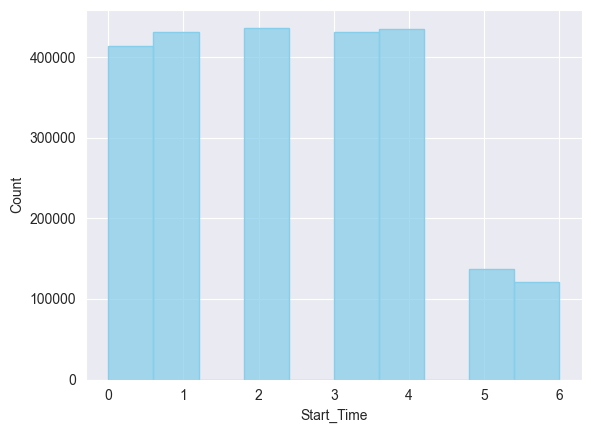

In [34]:
#accidents in day of week(use dayofweek)
sns.histplot(data.start_time.dt.dayofweek, bins=10, color="skyblue", edgecolor="skyblue")

<Axes: xlabel='Start_Time', ylabel='Count'>

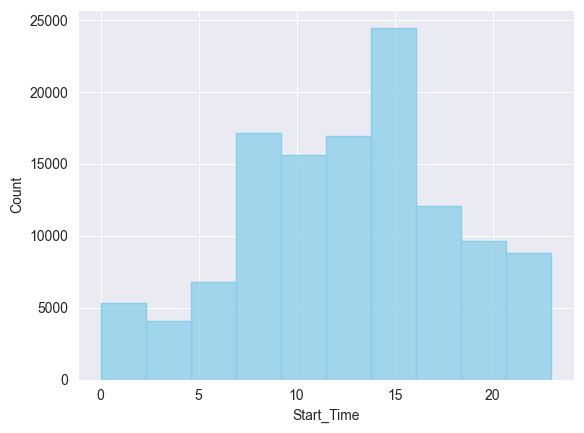

In [35]:
#lets check at what time accidents happens on weekends
sunday_start_time = data.start_time[data.start_time.dt.dayofweek == 6]
sns.histplot(sunday_start_time.dt.hour, bins=10, color="skyblue", edgecolor= "skyblue")

- less accidents happens on weekend maybe because people dont leave for work

<Axes: xlabel='Start_Time', ylabel='Count'>

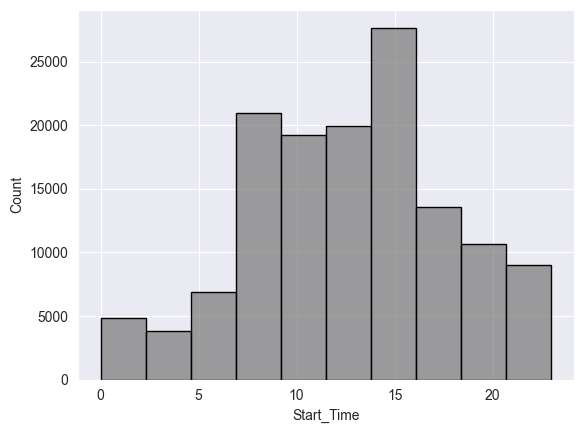

In [36]:
sat_start_time = data.start_time[data.start_time.dt.dayofweek == 5]
sns.histplot(sat_start_time.dt.hour, bins=10, color= "grey", edgecolor = "black")

- so we can analyse that on the weekends the accidents occures between 10am to 3pm

<Axes: xlabel='Start_Time', ylabel='Count'>

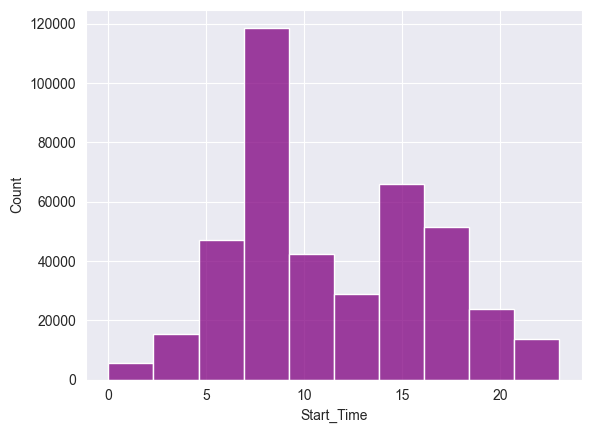

In [37]:
mon_start_time = data.start_time[data.start_time.dt.dayofweek == 0]
sns.histplot(mon_start_time.dt.hour, bins=10, color="purple")

<Axes: ylabel='count'>

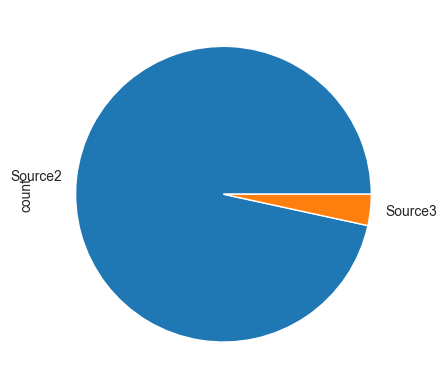

In [38]:
data.Source.value_counts().plot(kind='pie')

- above chart says that about 70% of data comes from source2 and 30% data from source3

# Start Latitude and Longitude

In [39]:
data.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
2405112    29.402639
2405113    29.496544
2405114    29.615950
2405115    33.860149
2405116    30.226601
Name: Start_Lat, Length: 2405117, dtype: float64

In [40]:
data.Start_Lng

0         -84.058723
1         -82.831184
2         -84.032608
3         -84.205582
4         -84.188354
             ...    
2405112   -98.483139
2405113   -98.400581
2405114   -98.358200
2405115   -98.561073
2405116   -92.017433
Name: Start_Lng, Length: 2405117, dtype: float64

In [41]:
sample_data = data.sample(int(0.1 * len(data)))

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

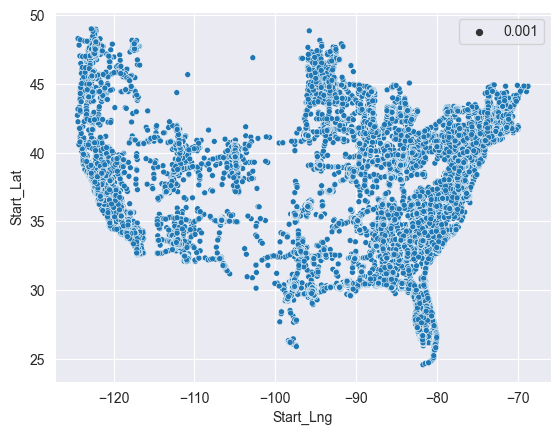

In [42]:
sns.scatterplot(x=sample_data.Start_Lng, y=sample_data.Start_Lat, size=0.001)

# Top 10 States with Highest number of accidents
- Which 5 states have the highest number of accidents? How about per capita?

In [43]:
state_accidents = data['State'].value_counts().reset_index()
state_accidents

,State,count
0,CA,470537
1,TX,259447
2,FL,211702
3,SC,160465
4,NY,108110
5,NC,107680
6,PA,89270
7,IL,78523
8,GA,69353
9,VA,66842


In [91]:
state_accidents.columns = ['State', 'accidents']

In [45]:
state_accidents_sorted = state_accidents.sort_values(by='accidents', ascending=False)
state_accidents_sorted

,State,accidents
0,CA,470537
1,TX,259447
2,FL,211702
3,SC,160465
4,NY,108110
5,NC,107680
6,PA,89270
7,IL,78523
8,GA,69353
9,VA,66842


In [46]:
top_10_states = state_accidents_sorted.head(10)

<Axes: xlabel='State', ylabel='accidents'>

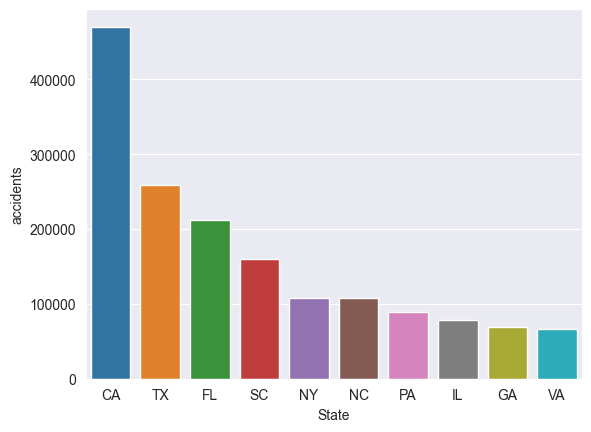

In [47]:
sns.barplot(x='State', y='accidents', data=top_10_states)

In [101]:
weather_val = data.Weather_Condition.unique()
weather_val

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

In [105]:
weather_val.size

126

In [106]:
weatherCondition = data.Weather_Condition.value_counts().reset_index()
weatherCondition

,Weather_Condition,count
0,Fair,753999
1,Mostly Cloudy,326880
2,Clear,275235
3,Cloudy,266255
4,Partly Cloudy,225584
...,...,...
120,Snow Grains,1
121,Hail,1
122,Blowing Sand,1
123,Light Haze,1


In [107]:
weatherCondition.columns = ['Weather_Condition', 'Accidents']

In [108]:
weatherCondition_sorted = weatherCondition.sort_values(by='Accidents', ascending=False)
weatherCondition_sorted

,Weather_Condition,Accidents
0,Fair,753999
1,Mostly Cloudy,326880
2,Clear,275235
3,Cloudy,266255
4,Partly Cloudy,225584
...,...,...
113,Freezing Rain / Windy,1
112,Heavy Thunderstorms and Snow,1
110,Partial Fog / Windy,1
109,Light Snow Shower / Windy,1


<Axes: ylabel='Count'>

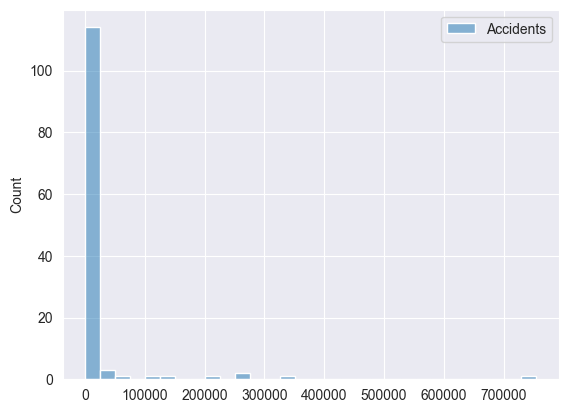

In [119]:
sns.histplot(weatherCondition_sorted, kde = False, bins= 30, color = "red")

In [ ]:
#above chart shows that in fair weather_condition most of the accidents has happened

# Conclusion
- Most number of accidents are occurred in Huston City
- 6am to 10am most number of accidents happens (maybe bcoz people in hurry to leave for office)
next highest % of accidents happens from 3 pm to 6 pm
- on weekends accidents occures between 10 am to 3 pm
- data orgin is source2 and cource3. about 70% of data comes from source2
- top 5 states with highest number of accidents are CA, TX, FL, SC, NY
- dataset dosent contain NewYork city data
- Over 1200+ cities have reported just one accident 